In [2]:
from collections import Counter,defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import pickle
from sklearn.metrics import adjusted_rand_score
from scipy.spatial import distance
import seaborn as sns
import tqdm

In [3]:
#from simulate_data import *
#from topic_model import *
from lda_clust.topic_model import *
from lda_clust.simulate_data import *

In [26]:
def ari_trace_fun(true_lab,post_draw_lab):
    trace_ari=np.zeros(len(post_draw_lab))
    for i in range(len(post_draw_lab)):
        trace_ari[i]=adjusted_rand_score(true_lab,post_draw_lab[i])
    return trace_ari

In [27]:
def clust_trace(post_draw):
    cl_trace=np.zeros(len(post_draw))
    for i in range(len(post_draw)):
        cl_trace[i]=len(np.unique(post_draw[i]))
    return cl_trace

In [28]:
def comm_clust_trace(data): #data: dict of form data['s']
    c=np.zeros(len(data[0]))
    #make values (lists) of inner dic, a single list
    for i in range(len(data[0])):
        ls_temp=list()
        for k,v in data.items():
            ls_temp.extend(np.unique(v[i]))
        c[i]=len(np.unique(ls_temp))
    return c    

In [29]:
def hamm_z(data,real_data):    
    c={}
    for i in tqdm.tqdm(range(len(data))):
        dic_temp={}
        for j in range(len(data[i])):
            ls_temp=list()
            for k in range(len(data[i][j])):
                ls_temp.append(distance.hamming(data[i][j][k],real_data[i][j]))
            dic_temp[j]=np.mean(ls_temp)
        c[i]=dic_temp
    return c

In [30]:
def ari_z(data,real_data):    
    c={}
    for i in tqdm.tqdm(range(len(data))):
        dic_temp={}
        for j in range(len(data[i])):
            ls_temp=list()
            for k in range(len(data[i][j])):
                ls_temp.append(adjusted_rand_score(data[i][j][k],real_data[i][j]))
            dic_temp[j]=np.mean(ls_temp)
        c[i]=dic_temp
    return c

## Topic overlap

### Model 1

In [12]:
# Simulation results for Custom init
top_overlap_model1_custom={}
overlap_list=list(['high','no'])
for i in overlap_list:
    with open(f'./simul_results/topic_overlap/model_1/res_model_1_{str(i)}_overlap_custom.pkl','rb') as file:     
        top_overlap_model1_custom[f'{str(i)}_overlap']=pickle.load(file)


In [15]:
# Simulated data
top_overlap_model1_data={}
overlap_list=list(['high','no'])
for i in overlap_list:
    with open(f'./simulated_data/topic_overlap/model_1/data_m1_{str(i)}_overlap.pkl','rb') as file:     
        top_overlap_model1_data[f'{str(i)}_overlap']=pickle.load(file)

In [15]:
top_overlap_model1_custom.keys()

dict_keys(['high_overlap', 'no_overlap'])

In [14]:
top_overlap_model1_custom['high_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_1/data_m1_high_overlap.pkl'

In [31]:
def scatt_plot_ari_t_fs_comb(sim_res_dic=None,data_dic=None,var_list=None,var_topic=None,ax = None):
    sns.set(font_scale=1)
    ari_list=list()
    size=list()
    for i in var_topic:
        ari_list.extend(ari_trace_fun(data_dic[f'{str(i)}_overlap']['t'],sim_res_dic[f'{str(i)}_overlap'][0]['t']))
        size.extend(np.repeat(i,len(sim_res_dic[f'{str(i)}_overlap'][0]['t'])))
    df=pd.DataFrame([ari_list,size]).T
    df.columns=["ARI for t","topic overlap"]
    g = sns.stripplot(x="topic overlap", y="ARI for t",data=df, ax = ax)
    return g

In [32]:
def chains_plot_ari_t_fs_comb(results,data,case,ax,x_ax):
    p=ari_trace_fun(data['t'],results[0]['t'])
    if x_ax:        
        g = pd.DataFrame(p).plot(xlabel = "itearations",ylabel="ARI for t",title=case,ax=ax)
        g.set_xticks([])
        g.set_xlabel('')
        g.get_legend().remove()
    else:
        g = pd.DataFrame(p).plot(xlabel = "itearations",ylabel="ARI for t",title=case,ax=ax)
        #g.set_xticks(np.array(range(1,1000,1))) 
        g.get_legend().remove()
    return g

[Text(0.5, 1.0, 'Custom init')]

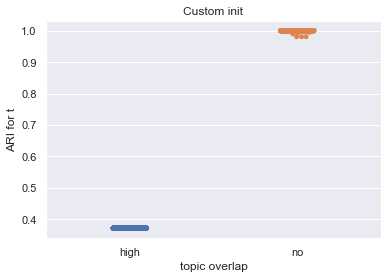

In [13]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model1_custom,data_dic=top_overlap_model1_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

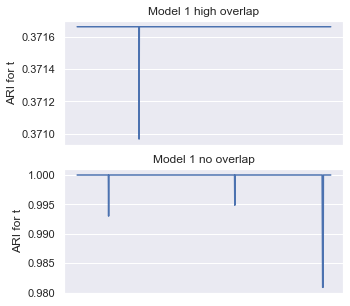

In [15]:
fig,axes = plt.subplots(2,1,figsize=(5,5))
x_ax1=np.array(["True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model1_custom[f'{str(i)}_overlap'],top_overlap_model1_data[f'{str(i)}_overlap'],
                                   f"Model 1 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

### Model 2

In [16]:
# Simulation results for Custom init
top_overlap_model2_custom={}
overlap_list=list(['high','no'])
for i in overlap_list:
    with open(f'./simul_results/topic_overlap/model_2/res_model_2_{str(i)}_overlap_custom.pkl','rb') as file:     
        top_overlap_model2_custom[f'{str(i)}_overlap']=pickle.load(file)

In [17]:
# Simulated data
top_overlap_model2_data={}
overlap_list=list(['high','no'])
for i in overlap_list:
    with open(f'./simulated_data/topic_overlap/model_2/data_m2_{str(i)}_overlap.pkl','rb') as file:     
        top_overlap_model2_data[f'{str(i)}_overlap']=pickle.load(file)

In [18]:
top_overlap_model2_custom['high_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_2/data_m2_high_overlap.pkl'

In [93]:
top_overlap_model2_data['no_overlap']['phi']

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.02222222, 0.02222222, 0.8       , 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222])}

[Text(0.5, 1.0, 'Custom init')]

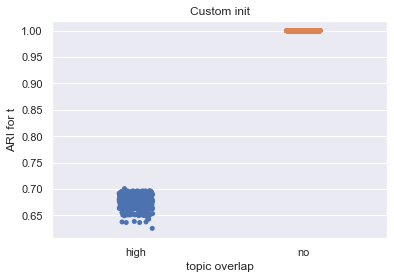

In [19]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model2_custom,data_dic=top_overlap_model2_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

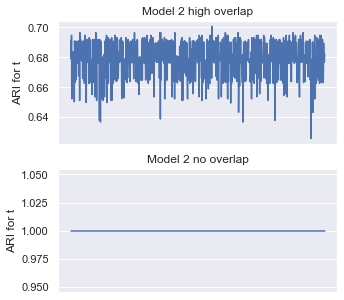

In [20]:
fig,axes = plt.subplots(2,1,figsize=(5,5))
x_ax1=np.array(["True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model2_custom[f'{str(i)}_overlap'],top_overlap_model2_data[f'{str(i)}_overlap'],
                                   f"Model 2 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

In [21]:
'''model2_hamm_z=dict()
for i in tqdm.tqdm(overlap_list):
    model2_hamm_z[f'{str(i)}_overlap']=hamm_z(top_overlap_model2_custom[f'{str(i)}_overlap'][0]['z'],top_overlap_model2_data[f'{str(i)}_overlap']['z'])
    with open(f'./simul_results/topic_overlap/model_2/res_model_2_{str(i)}_overlap_Hamm_z_custom.pkl','wb') as file:
        pickle.dump(model2_hamm_z[f'{str(i)}_overlap'],file,protocol=pickle.HIGHEST_PROTOCOL)'''
model2_hamm_z=dict()
for i in overlap_list:
    with open(f'./simul_results/topic_overlap/model_2/res_model_2_{str(i)}_overlap_Hamm_z_custom.pkl','rb') as file:     
        model2_hamm_z[f'{str(i)}_overlap']=pickle.load(file)

In [33]:
def visual_heatmap(dic,ax = None): # argument dic is the dictionary with values the mean Hamming for each command from post draws
    df = pd.DataFrame(dic)
    sns.set(font_scale=2)
    g = sns.heatmap(df, cmap="Reds", annot=False, ax=ax,vmin=0, vmax=1)
    #g.figure.axes[-1].set_yticklabels(g.get_yticks(),size=15)
    g.invert_yaxis()
    #g.set_yticklabels(g.get_yticks(), size = 10)
    #g.set_xticks(g.get_yticks(), size = 5)
    #g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 18)
    return g

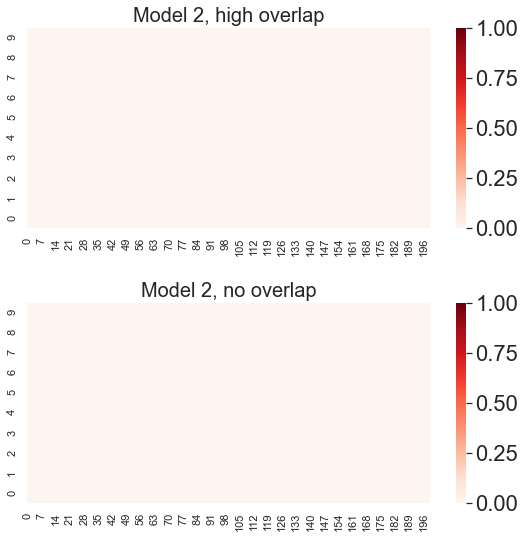

In [23]:
fig,axes = plt.subplots(2,1,figsize=(8,8))
visual_heatmap(model2_hamm_z['high_overlap'],ax=axes[0])
visual_heatmap(model2_hamm_z['no_overlap'],ax=axes[1])
axes[0].set_title("Model 2, high overlap", fontsize=20)
axes[1].set_title("Model 2, no overlap", fontsize=20)
fig.tight_layout()

### Model 3

In [24]:
# Simulation results for Custom init
top_overlap_model3_custom={}
overlap_list=list(['high','no'])
for i in overlap_list:
    with open(f'./simul_results/topic_overlap/model_3/res_model_3_{str(i)}_overlap_custom.pkl','rb') as file:     
        top_overlap_model3_custom[f'{str(i)}_overlap']=pickle.load(file)

In [25]:
top_overlap_model3_custom['no_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_3/data_m3_no_overlap.pkl'

In [26]:
# Simulated data
top_overlap_model3_data={}
overlap_list=list(['high','no'])
for i in overlap_list:
    with open(f'./simulated_data/topic_overlap/model_3/data_m3_{str(i)}_overlap.pkl','rb') as file:     
        top_overlap_model3_data[f'{str(i)}_overlap']=pickle.load(file)

In [95]:
top_overlap_model3_data['no_overlap']['phi']

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.02222222, 0.02222222, 0.8       , 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 4: array([0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.8       ,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 5: array([0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 6: array([0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222]),
 7: array([0.

[Text(0.5, 1.0, 'Custom init')]

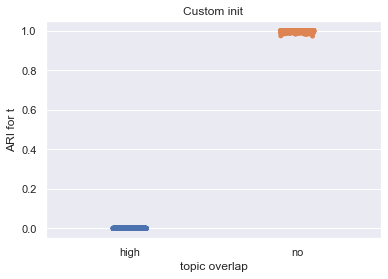

In [27]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model3_custom,data_dic=top_overlap_model3_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

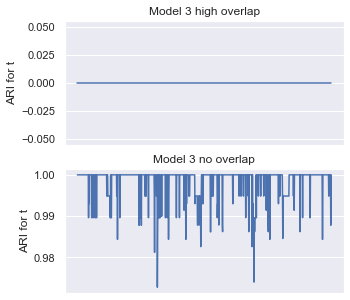

In [28]:
fig,axes = plt.subplots(2,1,figsize=(5,5))
x_ax1=np.array(["True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model3_custom[f'{str(i)}_overlap'],top_overlap_model3_data[f'{str(i)}_overlap'],
                                   f"Model 3 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

In [17]:
def run_ari_s(case,data,results,model,init): # case: string, model: string, init: string
    ari=np.zeros(shape=(len(data[f'{case}_overlap']['s']),len(results[f'{case}_overlap'][0]['t'])))
    for i in tqdm.tqdm(range(len(data[f'{case}_overlap']['s']))):
        ari[i]=ari_trace_fun(data[f'{case}_overlap']['s'][i],results[f'{case}_overlap'][0]['s'][i])
    #with open(f'./simul_results/topic_overlap/model_{model}/res_model_{model}_{case}_overlap_ARI_s_{init}.pkl','wb') as file:
    #    pickle.dump(ari,file,protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'/users/amantzio/Desktop/res_model_{model}_{case}_overlap_ARI_s_{init}.pkl','wb') as file:
        pickle.dump(ari,file,protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
for i in overlap_list:
    run_ari_s(i,top_overlap_model3_data,top_overlap_model3_custom,'3','custom')

100%|██████████| 200/200 [01:00<00:00,  3.30it/s]


In [34]:
mult_ari_s_m3_custom=dict()
for i in overlap_list: 
    with open(f'./simul_results/topic_overlap/model_3/res_model_3_{i}_overlap_ARI_s_custom.pkl','rb') as file:     
        mult_ari_s_m3_custom[f'{str(i)}_overlap']=pickle.load(file)

In [34]:
def scatt_plot_mean_ari_s(mult_ari_s_m3_custom,ax=None):
    mean_ari_no=np.mean(mult_ari_s_m3_custom['no_overlap'], axis=1)
    mean_ari_high=np.mean(mult_ari_s_m3_custom['high_overlap'], axis=1)
    r3=np.hstack([mean_ari_high,mean_ari_no])
    init3=np.hstack([np.repeat('high overlap',len(mean_ari_high)),np.repeat('no overlap',len(mean_ari_no))])
    df3=pd.DataFrame([r3,init3]).T
    df3.columns=["mean ARI for s","words"]
    g3 = sns.stripplot(x="words", y="mean ARI for s", data=df3,ax=ax)
    return g3

<AxesSubplot:xlabel='words', ylabel='mean ARI for s'>

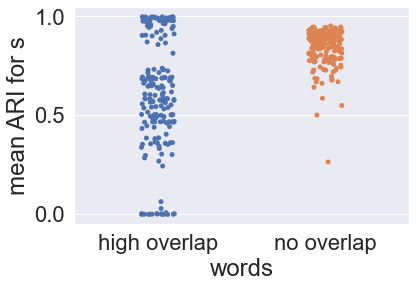

In [88]:
scatt_plot_mean_ari_s(mult_ari_s_m3_custom)

In [35]:
def chains_plot_mean_ari_s_fs(mult_ari,case,ax,x_ax):
    p=np.mean(mult_ari, axis=1)
    if x_ax:        
        g = pd.DataFrame(p).plot(xlabel = "itearations",ylabel="mean ARI for s",title=case,ax=ax)
        g.set_xticks([])
        g.set_xlabel('')
        g.get_legend().remove()
    else:
        g = pd.DataFrame(p).plot(xlabel = "itearations",ylabel="mean ARI for s",title=case,ax=ax)
        #g.set_xticks(np.array(range(1,1000,1))) 
        g.get_legend().remove()
    return g

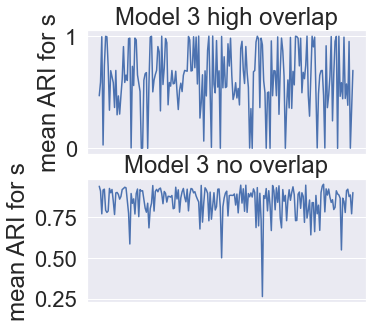

In [80]:
fig,axes = plt.subplots(2,1,figsize=(5,5))
x_ax1=np.array(["True","False"])
for num, i in enumerate(overlap_list):
    test=chains_plot_mean_ari_s_fs(mult_ari_s_m3_custom[f'{str(i)}_overlap'],f"Model 3 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

### Model 4

In [71]:
# Simulation results for Custom init
top_overlap_model4_custom={}
overlap_list=list(['high','no'])
for i in overlap_list:
    with open(f'./simul_results/topic_overlap/model_4/res_model_4_{str(i)}_overlap_custom.pkl','rb') as file:     
        top_overlap_model4_custom[f'{str(i)}_overlap']=pickle.load(file)

In [72]:
top_overlap_model4_custom['high_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_4/data_m4_high_overlap.pkl'

In [73]:
# Simulated data
top_overlap_model4_data={}
overlap_list=list(['high','no'])
for i in overlap_list:
    with open(f'./simulated_data/topic_overlap/model_4/data_m4_{str(i)}_overlap.pkl','rb') as file:     
        top_overlap_model4_data[f'{str(i)}_overlap']=pickle.load(file)

[Text(0.5, 1.0, 'Custom init')]

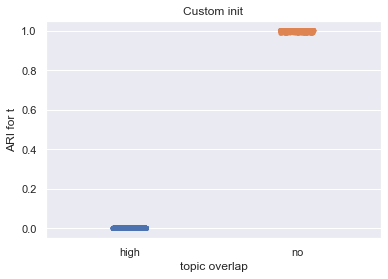

In [74]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model4_custom,data_dic=top_overlap_model4_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

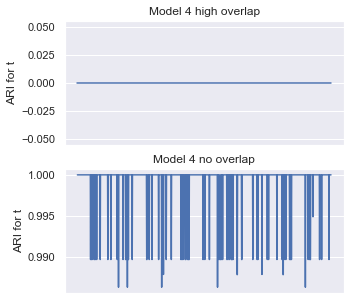

In [76]:
fig,axes = plt.subplots(2,1,figsize=(5,5))
x_ax1=np.array(["True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model4_custom[f'{str(i)}_overlap'],top_overlap_model4_data[f'{str(i)}_overlap'],
                                   f"Model 4 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

In [77]:
'''model4_hamm_z=dict()
for i in tqdm.tqdm(overlap_list):
    model4_hamm_z[f'{str(i)}_overlap']=hamm_z(top_overlap_model4_custom[f'{str(i)}_overlap'][0]['z'],top_overlap_model4_data[f'{str(i)}_overlap']['z'])
    with open(f'./simul_results/topic_overlap/model_4/res_model_4_{str(i)}_overlap_Hamm_z_custom.pkl','wb') as file:
        pickle.dump(model4_hamm_z[f'{str(i)}_overlap'],file,protocol=pickle.HIGHEST_PROTOCOL)'''
model4_hamm_z=dict()
for i in overlap_list:
    with open(f'./simul_results/topic_overlap/model_4/res_model_4_{str(i)}_overlap_Hamm_z_custom.pkl','rb') as file:     
        model4_hamm_z[f'{str(i)}_overlap']=pickle.load(file)

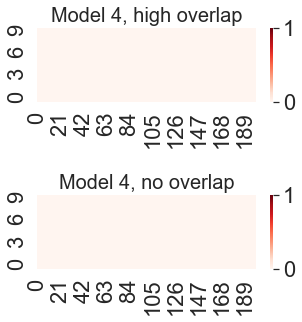

In [79]:
fig,axes = plt.subplots(2,1,figsize=(5,5))
visual_heatmap(model4_hamm_z['high_overlap'],ax=axes[0])
visual_heatmap(model4_hamm_z['no_overlap'],ax=axes[1])
axes[0].set_title("Model 4, high overlap", fontsize=20)
axes[1].set_title("Model 4, no overlap", fontsize=20)
fig.tight_layout()

In [81]:
for i in overlap_list:
    run_ari_s(i,top_overlap_model4_data,top_overlap_model4_custom,'4','custom')

100%|██████████| 200/200 [01:00<00:00,  3.32it/s]


In [82]:
mult_ari_s_m4_custom=dict()
for i in overlap_list: 
    with open(f'./simul_results/topic_overlap/model_4/res_model_4_{i}_overlap_ARI_s_custom.pkl','rb') as file:     
        mult_ari_s_m4_custom[f'{str(i)}_overlap']=pickle.load(file)

<AxesSubplot:xlabel='words', ylabel='mean ARI for s'>

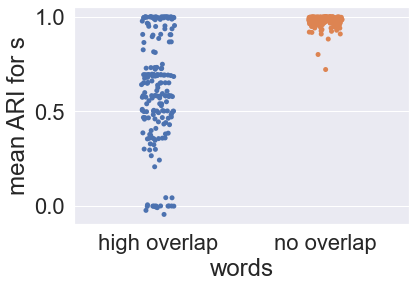

In [89]:
scatt_plot_mean_ari_s(mult_ari_s_m4_custom)

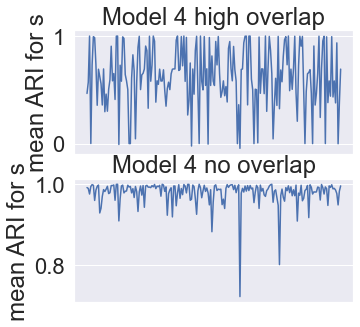

In [84]:
fig,axes = plt.subplots(2,1,figsize=(5,5))
x_ax1=np.array(["True","False"])
for num, i in enumerate(overlap_list):
    test=chains_plot_mean_ari_s_fs(mult_ari_s_m4_custom[f'{str(i)}_overlap'],f"Model 4 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

## Revised: Topic overlap

### Model 1

In [19]:
# Simulation results for Custom init
top_overlap_model1_custom={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simul_results/topic_overlap/model_1/res_model_1_{str(i)}_overlap_custom_rev2.pkl','rb') as file:     
            top_overlap_model1_custom[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simul_results/topic_overlap/model_1/res_model_1_{str(i)}_overlap_custom_rev.pkl','rb') as file:     
            top_overlap_model1_custom[f'{str(i)}_overlap']=pickle.load(file)
        

In [20]:
top_overlap_model1_custom['no_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_1/data_m1_no_overlap_rev.pkl'

In [44]:
# Simulated data
top_overlap_model1_data={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simulated_data/topic_overlap/model_1/data_m1_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model1_data[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simulated_data/topic_overlap/model_1/data_m1_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model1_data[f'{str(i)}_overlap']=pickle.load(file)

[Text(0.5, 1.0, 'Custom init')]

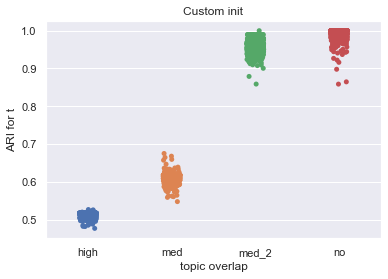

In [46]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model1_custom,data_dic=top_overlap_model1_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

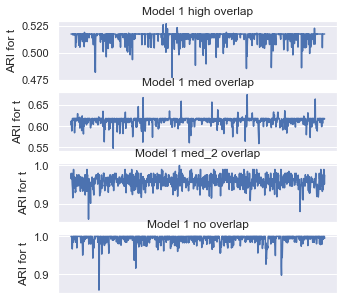

In [47]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model1_custom[f'{str(i)}_overlap'],top_overlap_model1_data[f'{str(i)}_overlap'],
                                   f"Model 1 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

### Model 2

In [21]:
# Simulation results for Custom init
top_overlap_model2_custom={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simul_results/topic_overlap/model_2/res_model_2_{str(i)}_overlap_custom_rev2.pkl','rb') as file:     
            top_overlap_model2_custom[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simul_results/topic_overlap/model_2/res_model_2_{str(i)}_overlap_custom_rev.pkl','rb') as file:     
            top_overlap_model2_custom[f'{str(i)}_overlap']=pickle.load(file)

In [22]:
top_overlap_model2_custom['no_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_2/data_m2_no_overlap_rev.pkl'

In [50]:
# Simulated data
top_overlap_model2_data={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simulated_data/topic_overlap/model_2/data_m2_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model2_data[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simulated_data/topic_overlap/model_2/data_m2_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model2_data[f'{str(i)}_overlap']=pickle.load(file)

In [46]:
top_overlap_model2_data['high_overlap']['phi']

{0: array([0.07692308, 0.23076923, 0.08653846, 0.08653846, 0.08653846,
        0.08653846, 0.08653846, 0.08653846, 0.08653846, 0.08653846]),
 1: array([0.07692308, 0.30769231, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 2: array([0.08653846, 0.08653846, 0.07692308, 0.23076923, 0.08653846,
        0.08653846, 0.08653846, 0.08653846, 0.08653846, 0.08653846]),
 3: array([0.07692308, 0.07692308, 0.07692308, 0.30769231, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308])}

Text(0.5, 1.0, 'Distribution of words under each topic k')

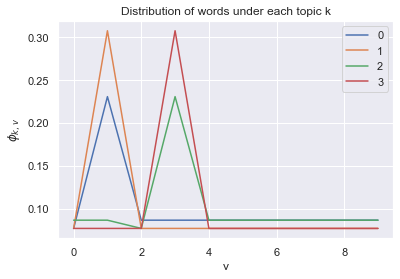

In [49]:
ax = pd.DataFrame(list(top_overlap_model2_data['high_overlap']['phi'].values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

[Text(0.5, 1.0, 'Custom init')]

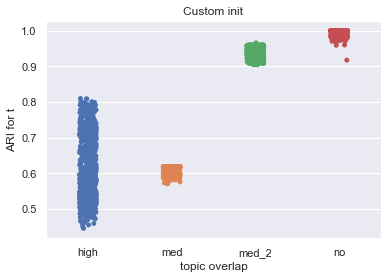

In [52]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model2_custom,data_dic=top_overlap_model2_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

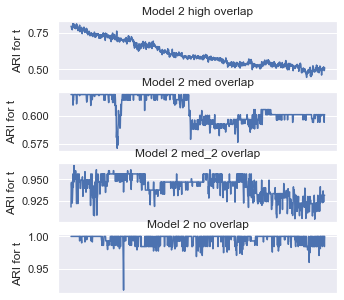

In [54]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model2_custom[f'{str(i)}_overlap'],top_overlap_model2_data[f'{str(i)}_overlap'],
                                   f"Model 2 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

In [56]:
'''model2_hamm_z=dict()
for i in tqdm.tqdm(overlap_list):
    model2_hamm_z[f'{str(i)}_overlap']=hamm_z(top_overlap_model2_custom[f'{str(i)}_overlap'][0]['z'],top_overlap_model2_data[f'{str(i)}_overlap']['z'])
    with open(f'./simul_results/topic_overlap/model_2/res_model_2_{str(i)}_overlap_Hamm_z_custom_rev.pkl','wb') as file:
        pickle.dump(model2_hamm_z[f'{str(i)}_overlap'],file,protocol=pickle.HIGHEST_PROTOCOL)'''
model2_hamm_z=dict()
for i in overlap_list:
    if i=="no":
        with open(f'./simul_results/topic_overlap/model_2/res_model_2_{str(i)}_overlap_Hamm_z_custom_rev2.pkl','rb') as file:     
            model2_hamm_z[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simul_results/topic_overlap/model_2/res_model_2_{str(i)}_overlap_Hamm_z_custom_rev.pkl','rb') as file:     
            model2_hamm_z[f'{str(i)}_overlap']=pickle.load(file)

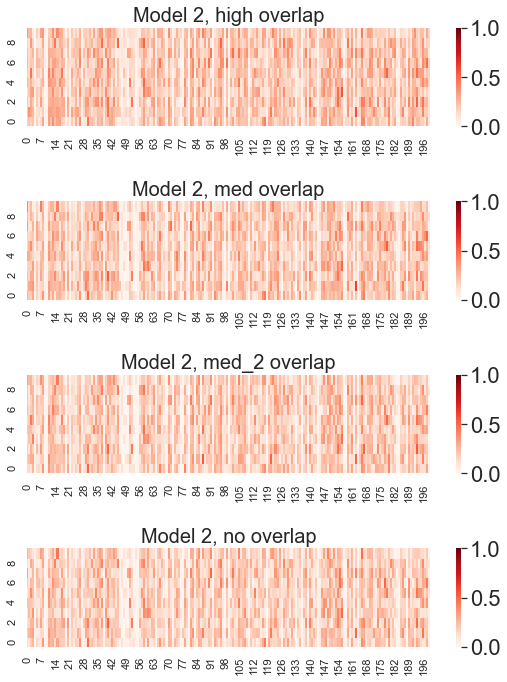

In [57]:
fig,axes = plt.subplots(4,1,figsize=(8,10))
visual_heatmap(model2_hamm_z['high_overlap'],ax=axes[0])
visual_heatmap(model2_hamm_z['med_overlap'],ax=axes[1])
visual_heatmap(model2_hamm_z['med_2_overlap'],ax=axes[2])
visual_heatmap(model2_hamm_z['no_overlap'],ax=axes[3])
axes[0].set_title("Model 2, high overlap", fontsize=20)
axes[1].set_title("Model 2, med overlap", fontsize=20)
axes[2].set_title("Model 2, med_2 overlap", fontsize=20)
axes[3].set_title("Model 2, no overlap", fontsize=20)
fig.tight_layout()

### Model 3

In [58]:
# Simulation results for Custom init
top_overlap_model3_custom={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simul_results/topic_overlap/model_3/res_model_3_{str(i)}_overlap_custom_rev2.pkl','rb') as file:     
            top_overlap_model3_custom[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simul_results/topic_overlap/model_3/res_model_3_{str(i)}_overlap_custom_rev.pkl','rb') as file:     
            top_overlap_model3_custom[f'{str(i)}_overlap']=pickle.load(file)

In [59]:
top_overlap_model3_custom['med_2_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_3/data_m3_med_2_overlap_rev.pkl'

In [65]:
top_overlap_model3_custom['no_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_3/data_m3_no_overlap_rev.pkl'

In [61]:
# Simulated data
top_overlap_model3_data={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simulated_data/topic_overlap/model_3/data_m3_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model3_data[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simulated_data/topic_overlap/model_3/data_m3_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model3_data[f'{str(i)}_overlap']=pickle.load(file)

[Text(0.5, 1.0, 'Custom init')]

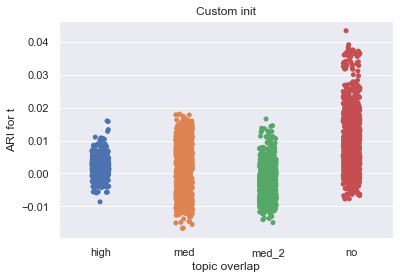

In [62]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model3_custom,data_dic=top_overlap_model3_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

[Text(0.5, 1.0, 'Custom init')]

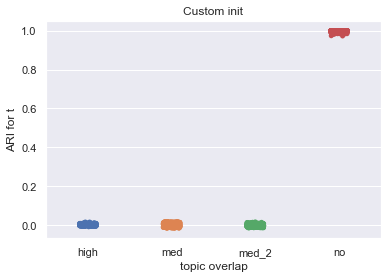

In [33]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model3_custom,data_dic=top_overlap_model3_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

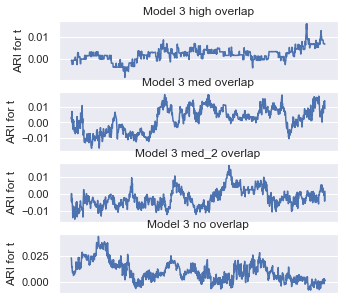

In [66]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model3_custom[f'{str(i)}_overlap'],top_overlap_model3_data[f'{str(i)}_overlap'],
                                   f"Model 3 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

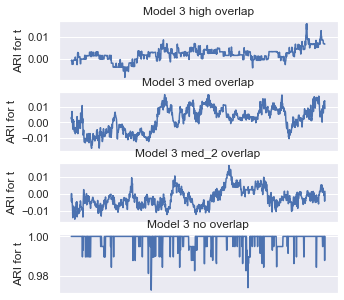

In [34]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model3_custom[f'{str(i)}_overlap'],top_overlap_model3_data[f'{str(i)}_overlap'],
                                   f"Model 3 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

In [67]:
def run_ari_s(case,data,results,model,init): # case: string, model: string, init: string
    ari=np.zeros(shape=(len(data[f'{case}_overlap']['s']),len(results[f'{case}_overlap'][0]['t'])))
    for i in tqdm.tqdm(range(len(data[f'{case}_overlap']['s']))):
        ari[i]=ari_trace_fun(data[f'{case}_overlap']['s'][i],results[f'{case}_overlap'][0]['s'][i])
    with open(f'./simul_results/topic_overlap/model_{model}/res_model_{model}_{case}_overlap_ARI_s_{init}_rev2.pkl','wb') as file:
        pickle.dump(ari,file,protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
overlap_list_2=['high','med']
overlap_list_2

['high', 'med']

In [93]:
for i in overlap_list_2:
    run_ari_s(i,top_overlap_model3_data,top_overlap_model3_custom,'3','custom')

100%|██████████| 200/200 [01:01<00:00,  3.25it/s]


In [69]:
mult_ari_s_m3_custom=dict()
for i in overlap_list:
    if i=='no':
        with open(f'./simul_results/topic_overlap/model_3/res_model_3_{i}_overlap_ARI_s_custom_rev2.pkl','rb') as file:     
            mult_ari_s_m3_custom[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simul_results/topic_overlap/model_3/res_model_3_{i}_overlap_ARI_s_custom_rev.pkl','rb') as file:     
            mult_ari_s_m3_custom[f'{str(i)}_overlap']=pickle.load(file)

In [48]:
mult_ari_s_m3_custom.keys()

dict_keys(['high_overlap', 'med_overlap', 'med_2_overlap', 'no_overlap'])

In [70]:
def scatt_plot_mean_ari_s(mult_ari_s_m3_custom,ax=None):
    mean_ari_no=np.mean(mult_ari_s_m3_custom['no_overlap'], axis=1)
    mean_ari_med=np.mean(mult_ari_s_m3_custom['med_overlap'], axis=1)
    mean_ari_med_2=np.mean(mult_ari_s_m3_custom['med_2_overlap'], axis=1)
    mean_ari_high=np.mean(mult_ari_s_m3_custom['high_overlap'], axis=1)
    r3=np.hstack([mean_ari_high,mean_ari_med,mean_ari_med_2,mean_ari_no])
    init3=np.hstack([np.repeat('high overlap',len(mean_ari_high)),np.repeat('medium overlap',len(mean_ari_high)),
                     np.repeat('medium 2 overlap',len(mean_ari_high)),np.repeat('no overlap',len(mean_ari_no))])
    df3=pd.DataFrame([r3,init3]).T
    df3.columns=["mean ARI for s","overlap size"]
    g3 = sns.stripplot(x="overlap size", y="mean ARI for s", data=df3,ax=ax)
    return g3

<AxesSubplot:xlabel='overlap size', ylabel='mean ARI for s'>

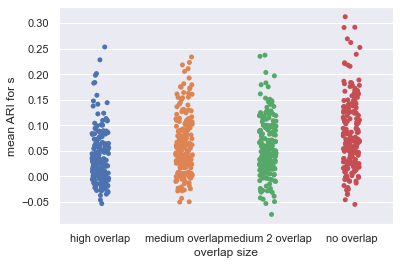

In [71]:
scatt_plot_mean_ari_s(mult_ari_s_m3_custom)

<AxesSubplot:xlabel='overlap size', ylabel='mean ARI for s'>

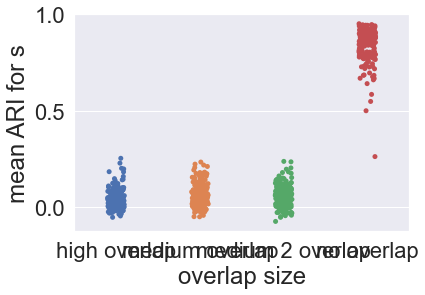

In [50]:
scatt_plot_mean_ari_s(mult_ari_s_m3_custom)

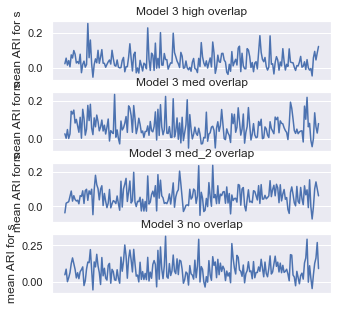

In [72]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])
for num, i in enumerate(overlap_list):
    test=chains_plot_mean_ari_s_fs(mult_ari_s_m3_custom[f'{str(i)}_overlap'],f"Model 3 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

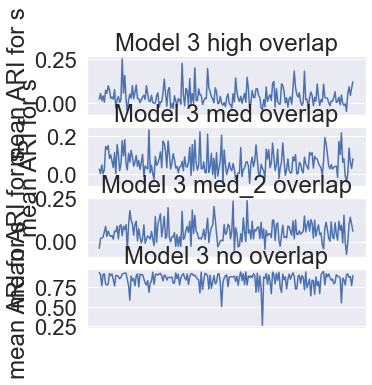

In [51]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])
for num, i in enumerate(overlap_list):
    test=chains_plot_mean_ari_s_fs(mult_ari_s_m3_custom[f'{str(i)}_overlap'],f"Model 3 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

### Model 4

In [73]:
# Simulation results for Custom init
top_overlap_model4_custom={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simul_results/topic_overlap/model_4/res_model_4_{str(i)}_overlap_custom_rev2.pkl','rb') as file:     
            top_overlap_model4_custom[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simul_results/topic_overlap/model_4/res_model_4_{str(i)}_overlap_custom_rev.pkl','rb') as file:     
            top_overlap_model4_custom[f'{str(i)}_overlap']=pickle.load(file)

In [36]:
top_overlap_model4_custom['med_2_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_4/data_m4_med_2_overlap_rev.pkl'

In [74]:
top_overlap_model4_custom['no_overlap'][1]['data_dir']

'./simulated_data/topic_overlap/model_4/data_m4_no_overlap_rev.pkl'

In [82]:
# Simulated data
top_overlap_model4_data={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simulated_data/topic_overlap/model_4/data_m4_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model4_data[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simulated_data/topic_overlap/model_4/data_m4_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model4_data[f'{str(i)}_overlap']=pickle.load(file)

[Text(0.5, 1.0, 'Custom init')]

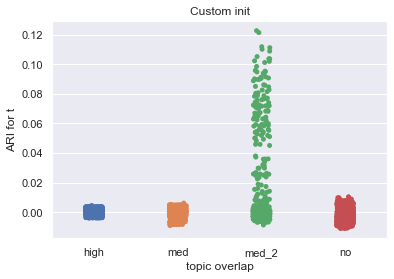

In [83]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model4_custom,data_dic=top_overlap_model4_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

[Text(0.5, 1.0, 'Custom init')]

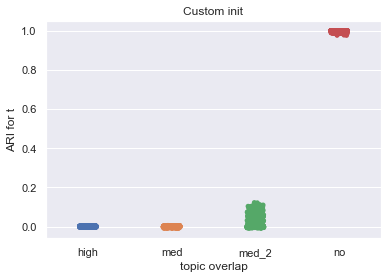

In [38]:
fig=scatt_plot_ari_t_fs_comb(sim_res_dic=top_overlap_model4_custom,data_dic=top_overlap_model4_data,
                             var_topic=overlap_list)
fig.set(title='Custom init')

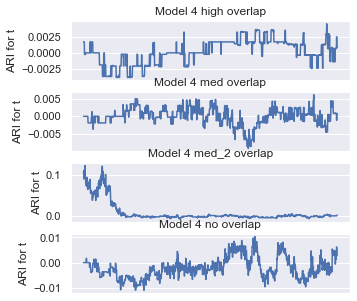

In [79]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model4_custom[f'{str(i)}_overlap'],top_overlap_model4_data[f'{str(i)}_overlap'],
                                   f"Model 4 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

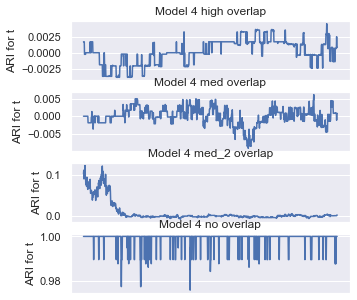

In [39]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])#np.concatenate((np.repeat("True",5),np.array(["False"])))
for num, i in enumerate(overlap_list):
    test=chains_plot_ari_t_fs_comb(top_overlap_model4_custom[f'{str(i)}_overlap'],top_overlap_model4_data[f'{str(i)}_overlap'],
                                   f"Model 4 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

In [84]:
test=ari_trace_fun(top_overlap_model4_data[f'med_overlap']['t'],top_overlap_model4_custom[f'high_overlap'][0]['t'])

In [84]:
run_ari_s('no',top_overlap_model4_data,top_overlap_model4_custom,'4','custom')

100%|██████████| 200/200 [01:01<00:00,  3.23it/s]


In [32]:
for i in overlap_list_2:
    run_ari_s(i,top_overlap_model4_data,top_overlap_model4_custom,'4','custom')

100%|██████████| 200/200 [01:02<00:00,  3.21it/s]


In [85]:
mult_ari_s_m4_custom=dict()
for i in overlap_list:
    if i=='no':
        with open(f'./simul_results/topic_overlap/model_4/res_model_4_{i}_overlap_ARI_s_custom_rev2.pkl','rb') as file:     
            mult_ari_s_m4_custom[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simul_results/topic_overlap/model_4/res_model_4_{i}_overlap_ARI_s_custom_rev.pkl','rb') as file:     
            mult_ari_s_m4_custom[f'{str(i)}_overlap']=pickle.load(file)

<AxesSubplot:xlabel='overlap size', ylabel='mean ARI for s'>

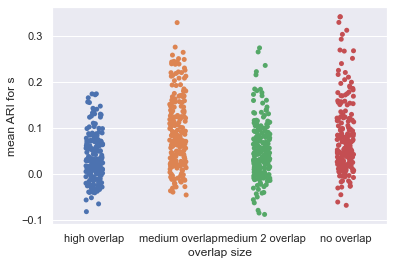

In [86]:
scatt_plot_mean_ari_s(mult_ari_s_m4_custom)

<AxesSubplot:xlabel='overlap size', ylabel='mean ARI for s'>

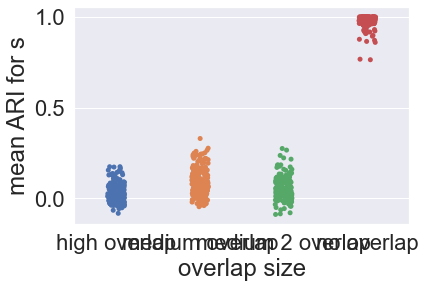

In [54]:
scatt_plot_mean_ari_s(mult_ari_s_m4_custom)

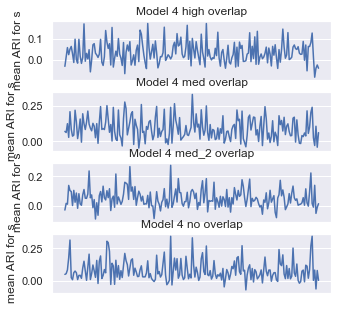

In [87]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])
for num, i in enumerate(overlap_list):
    test=chains_plot_mean_ari_s_fs(mult_ari_s_m4_custom[f'{str(i)}_overlap'],f"Model 4 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num]) 

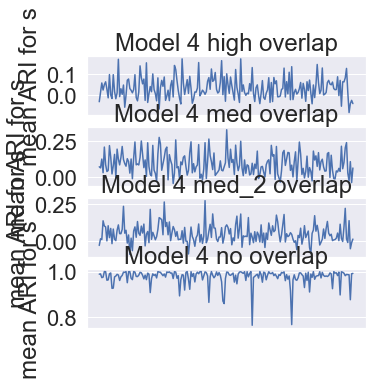

In [55]:
fig,axes = plt.subplots(4,1,figsize=(5,5))
x_ax1=np.array(["True","True","True","False"])
for num, i in enumerate(overlap_list):
    test=chains_plot_mean_ari_s_fs(mult_ari_s_m4_custom[f'{str(i)}_overlap'],f"Model 4 {str(i)} overlap",
                                   ax=axes[num],x_ax=x_ax1[num])

In [64]:
overlap_list_2

['high', 'med']

In [88]:
test2=hamm_z(top_overlap_model4_custom[f'no_overlap'][0]['z'],top_overlap_model4_data[f'no_overlap']['z'])
with open(f'./simul_results/topic_overlap/model_4/res_model_4_no_overlap_Hamm_z_custom_rev2.pkl','wb') as file:
    pickle.dump(test2,file,protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 200/200 [00:18<00:00, 10.55it/s]


In [90]:
'''model4_hamm_z=dict()
for i in tqdm.tqdm(overlap_list_2):
    model4_hamm_z[f'{str(i)}_overlap']=hamm_z(top_overlap_model4_custom[f'{str(i)}_overlap'][0]['z'],top_overlap_model4_data[f'{str(i)}_overlap']['z'])
    with open(f'./simul_results/topic_overlap/model_4/res_model_4_{str(i)}_overlap_Hamm_z_custom_rev.pkl','wb') as file:
        pickle.dump(model4_hamm_z[f'{str(i)}_overlap'],file,protocol=pickle.HIGHEST_PROTOCOL)'''
model4_hamm_z=dict()
for i in overlap_list:
    if i=='no':
        with open(f'./simul_results/topic_overlap/model_4/res_model_4_{i}_overlap_Hamm_z_custom_rev2.pkl','rb') as file:     
            model4_hamm_z[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simul_results/topic_overlap/model_4/res_model_4_{str(i)}_overlap_Hamm_z_custom_rev.pkl','rb') as file:     
            model4_hamm_z[f'{str(i)}_overlap']=pickle.load(file)

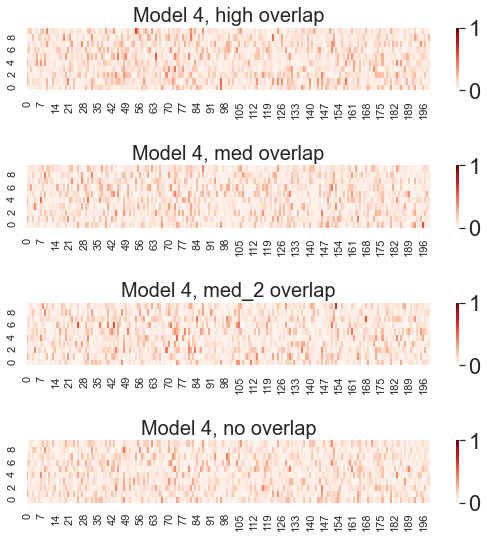

In [91]:
fig,axes = plt.subplots(4,1,figsize=(8,8))
visual_heatmap(model4_hamm_z['high_overlap'],ax=axes[0])
visual_heatmap(model4_hamm_z['med_overlap'],ax=axes[1])
visual_heatmap(model4_hamm_z['med_2_overlap'],ax=axes[2])
visual_heatmap(model4_hamm_z['no_overlap'],ax=axes[3])
axes[0].set_title("Model 4, high overlap", fontsize=20)
axes[1].set_title("Model 4, med overlap", fontsize=20)
axes[2].set_title("Model 4, med_2 overlap", fontsize=20)
axes[3].set_title("Model 4, no overlap", fontsize=20)
fig.tight_layout()

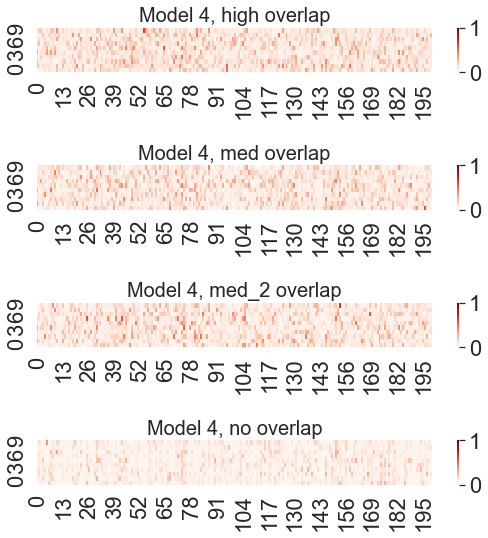

In [58]:
fig,axes = plt.subplots(4,1,figsize=(8,8))
visual_heatmap(model4_hamm_z['high_overlap'],ax=axes[0])
visual_heatmap(model4_hamm_z['med_overlap'],ax=axes[1])
visual_heatmap(model4_hamm_z['med_2_overlap'],ax=axes[2])
visual_heatmap(model4_hamm_z['no_overlap'],ax=axes[3])
axes[0].set_title("Model 4, high overlap", fontsize=20)
axes[1].set_title("Model 4, med overlap", fontsize=20)
axes[2].set_title("Model 4, med_2 overlap", fontsize=20)
axes[3].set_title("Model 4, no overlap", fontsize=20)
fig.tight_layout()